In [1]:
import sys
sys.path.append('..')

In [2]:
from workspace import nometools as nome

In [3]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
main_path = '/home/kevin/DNA-Methylation-patterns/'
data_path = main_path + 'downstream/'

In [5]:
infile = data_path + 'GCH.promoter.intersect.bed'
_, df_GCH_meth = nome.get_promoter_methylation(infile)

In [6]:
df_GCH_meth.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
0,NM_001005277-621034,NM_001005277,OR4F16,chr1,621034,624034,621095,622034,-,622849,622850,1184,-816,33.33,3
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857344,857345,42,-1958,66.67,3
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857350,857351,48,-1952,20.00,5
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857351,857352,49,-1951,66.67,3
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857391,857392,89,-1911,50.00,4


In [7]:
df_GCH_meth_filtered = df_GCH_meth[df_GCH_meth['chrom'] == 'chr1']
# df_filtered = df[np.all((df['chrom'] == 'chr1', df['coverage'] > 2), axis = 0)]

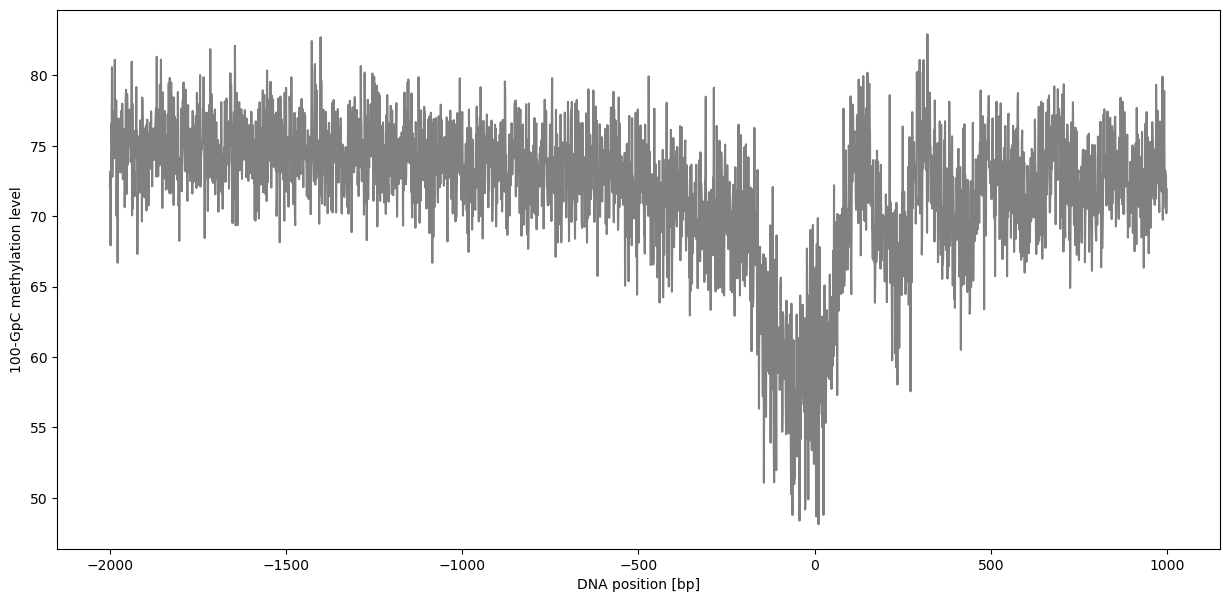

In [8]:
nome.plot_avg_methylation_levels(df_GCH_meth_filtered, 'GCH')

In [9]:
print('no of promoters in chr1', len(df_GCH_meth_filtered['trans_id'].unique()))

no of promoters in chr1 3208


In [10]:
reffile = data_path + 'refGene.promoters.bed'
n = 0
with open(reffile, 'r') as fin:
    for line in fin:
        n = sum(1 if line.split('/t')[0] == 'chr1' else 0 for line in fin)

print('no of promoters in chr1 (from promoter file)', len(df_GCH_meth_filtered['trans_id'].unique()))

no of promoters in chr1 (from promoter file) 3208


In [11]:
infile = data_path + 'GCH.NDR.chr1.intersect.bed'
df_NDR = nome.get_nuc_positions(infile)

In [12]:
df_NDR.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
0,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857838,857914,536,612,-1464,-1388,76
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,858573,858790,1271,1488,-729,-512,217
2,NM_015658-893636,NM_015658,NOC2L,chr1,893636,896636,879582,894636,-,894330,894427,2209,2306,209,306,97
3,NM_015658-893636,NM_015658,NOC2L,chr1,893636,896636,879582,894636,-,895040,895069,1567,1596,-433,-404,29
4,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,894330,894427,367,464,-1633,-1536,97


In [13]:
print('no of promoters in chr1 (NDR)', len(df_NDR['trans_id'].unique()))

no of promoters in chr1 (NDR) 3065


In [14]:
# df_filtered = df[df['strand'] == '+']
df_filtered = df_NDR[df_NDR['region_length']>140]

In [28]:
## gaps  > 147
df_filtered =  df_filtered.iloc[1:][df_filtered['nuc_region_end_genome'].to_numpy()[1:] - df_filtered['nuc_region_start_genome'].to_numpy()[:-1] > 147]

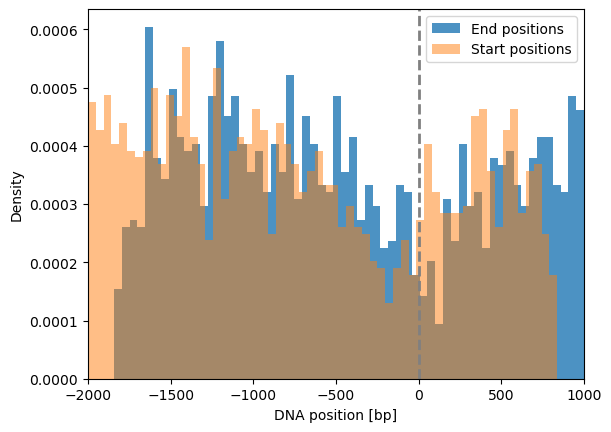

In [29]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure()

plt.hist(df_filtered['nuc_end_promo_rel'],  bins = 60, histtype='bar', density=True, label="End positions", alpha = 0.8)  
plt.hist(df_filtered['nuc_start_promo_rel'], bins = 60, histtype='bar', density=True, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()

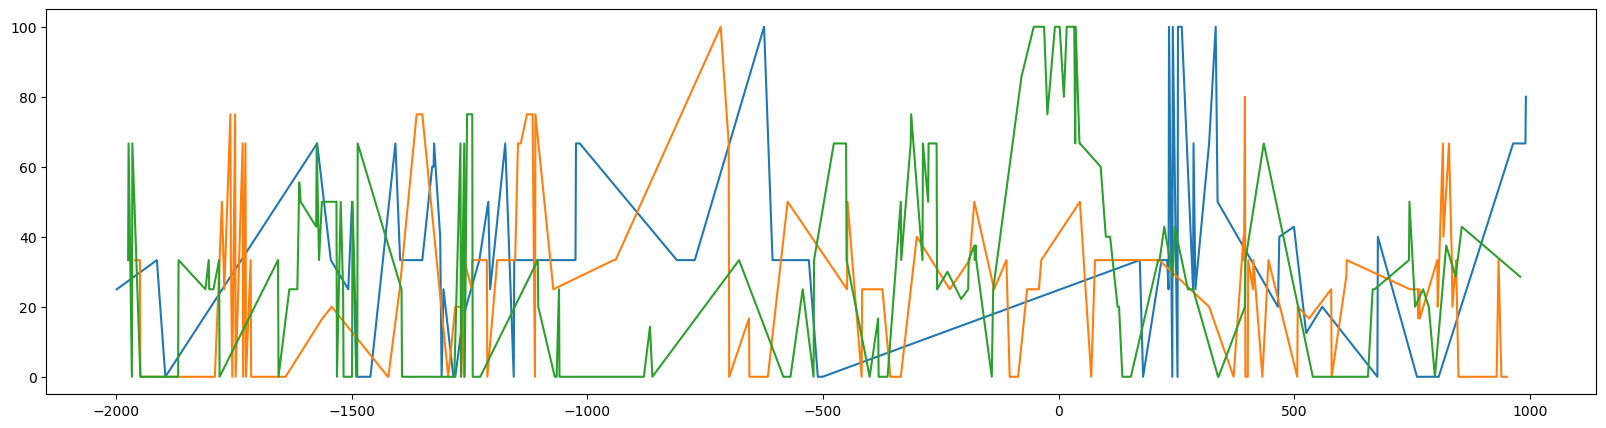

In [30]:
plt.figure(figsize=(20,5))
groups = df_GCH_meth_filtered.groupby('trans_id')
for i, (name, group) in enumerate(groups):
    # print(name)
    # print(group[['meth_pos_promo_rel', 'meth_rate']])
    xy = group[['meth_pos_promo_rel', 'meth_rate']].groupby('meth_pos_promo_rel').mean()
    plt.plot(xy)

    if i > 1:
        break

# plt.xlim((-500,500))

In [31]:
df_NDR[df_NDR['trans_id'] == name]

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
3912,NM_000066-57430688,NM_000066,C8B,chr1,57430688,57433688,57394879,57431688,-,57430708,57430867,2821,2980,821,980,159
3913,NM_000066-57430688,NM_000066,C8B,chr1,57430688,57433688,57394879,57431688,-,57430902,57431293,2395,2786,395,786,391
3914,NM_000066-57430688,NM_000066,C8B,chr1,57430688,57433688,57394879,57431688,-,57431413,57431478,2210,2275,210,275,65
3915,NM_000066-57430688,NM_000066,C8B,chr1,57430688,57433688,57394879,57431688,-,57432137,57432166,1522,1551,-478,-449,29
3916,NM_000066-57430688,NM_000066,C8B,chr1,57430688,57433688,57394879,57431688,-,57432923,57432957,731,765,-1269,-1235,34
3917,NM_000066-57430688,NM_000066,C8B,chr1,57430688,57433688,57394879,57431688,-,57433209,57433303,385,479,-1615,-1521,94


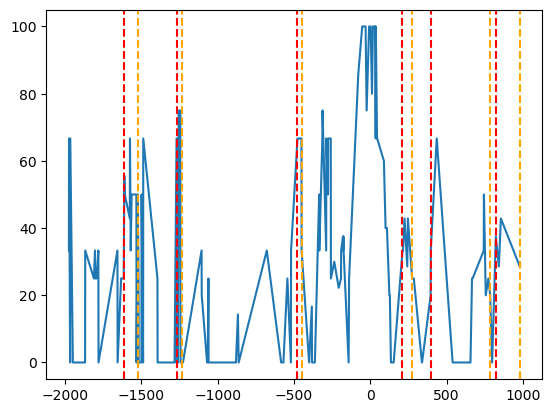

In [32]:
plt.plot(xy)
temp = df_NDR[df_NDR['trans_id'] == name]
for i in range(len(temp)):
    plt.axvline(x=temp.iloc[i]['nuc_start_promo_rel'], color='red', linestyle='--')
    plt.axvline(x=temp.iloc[i]['nuc_end_promo_rel'], color='orange', linestyle='--')

NM_000016-76188393


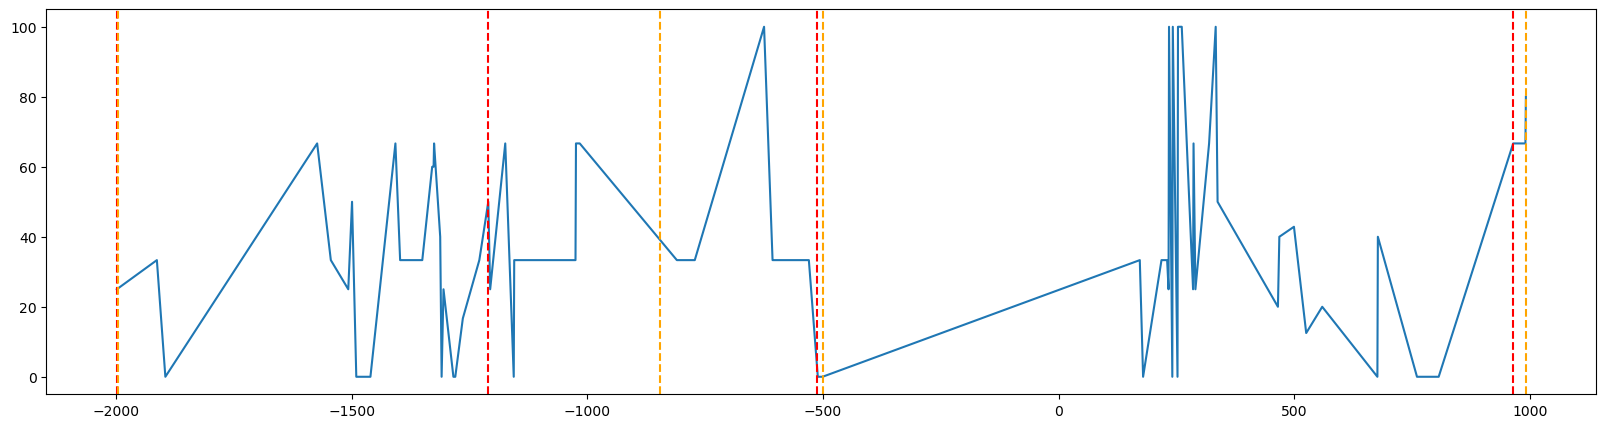

NM_000036-115237167


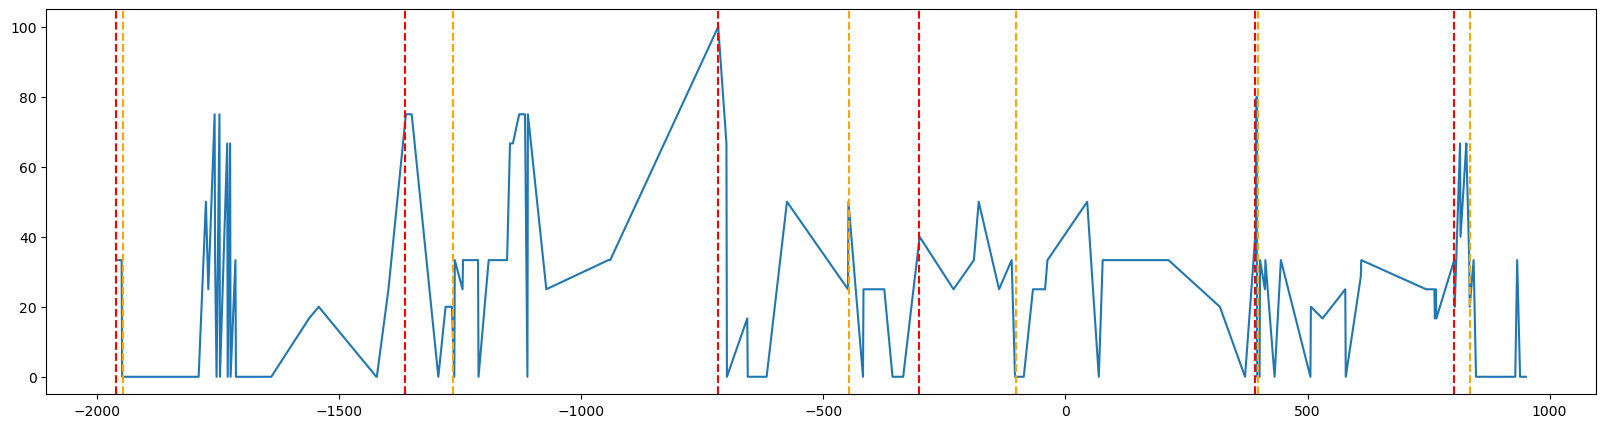

NM_000066-57430688


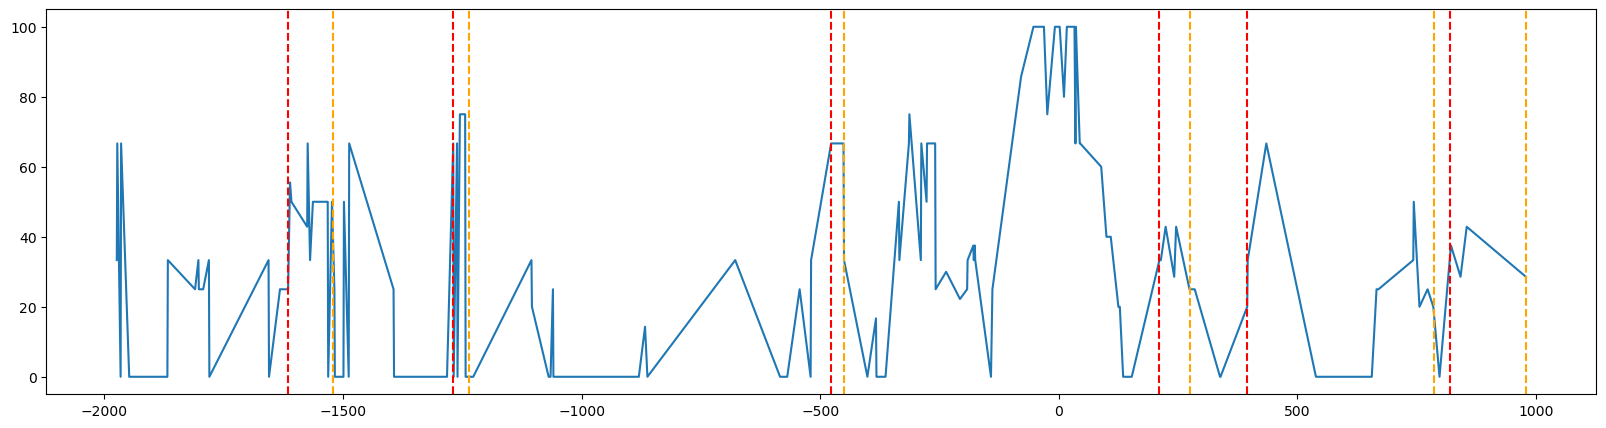

In [33]:
# plt.figure(figsize=(20,5))
groups = df_GCH_meth_filtered.groupby('trans_id')
for i, (name, group) in enumerate(groups):
    plt.figure(figsize=(20,5))
    print(name)
    # print(group[['meth_pos_promo_rel', 'meth_rate']])
    xy = group[['meth_pos_promo_rel', 'meth_rate']].groupby('meth_pos_promo_rel').mean()
    plt.plot(xy)
    temp = df_NDR[df_NDR['trans_id'] == name]
    for j in range(len(temp)):
        plt.axvline(x=temp.iloc[j]['nuc_start_promo_rel'], color='red', linestyle='--')
        plt.axvline(x=temp.iloc[j]['nuc_end_promo_rel'], color='orange', linestyle='--')
    plt.show()
    if i == 2:
        break